In [37]:
import numpy as np 
import matplotlib.pyplot as plt
import cv2 
import math
import os
import glob
import operator
import tensorflow as tf
from __future__ import division



%matplotlib inline  

In [38]:
# load the images

filelist = glob.glob('C:/Users/ahmad/Desktop/Human-Re-id/Dataset/*.bmp')
dataset = np.array([np.array(cv2.imread(fname)) for fname in filelist])


In [39]:
print("The shape of each image = ", dataset[1].shape)
print("The total number of images =", len(dataset))

The shape of each image =  (128, 48, 3)
The total number of images = 1263


In [40]:
# Initialize the parameters 
def initialize_parameters():

    tf.set_random_seed(1)                              # so that your "random" numbers match ours
        
    W1 = tf.get_variable("W1" , [4,4,3,8], initializer = tf.contrib.layers.xavier_initializer(seed = 0))
    W2 = tf.get_variable("W2", [2,2,8,16], initializer = tf.contrib.layers.xavier_initializer(seed = 0))

    parameters = {"W1": W1,
                  "W2": W2}
    
    return parameters

In [41]:
# Create a placeholder 

def create_placeholders(n_H0, n_W0, n_C0):
    """
    Arguments:
    n_H0 -- scalar, height of an input image
    n_W0 -- scalar, width of an input image
    n_C0 -- scalar, number of channels of the input
    n_y -- scalar, number of classes
    """    
    X = tf.placeholder(tf.float32 , [1 ,n_H0, n_W0, n_C0])
    
    #Y = tf.placeholder(tf.float32, [None, n_y])

    
    return X

In [42]:
# Initialize the parameters 

def initialize_parameters():
    
    tf.set_random_seed(1)                                  
    W1 = tf.get_variable("W1" , [4,4,3,8], initializer = tf.contrib.layers.xavier_initializer(seed = 0))
    W2 = tf.get_variable("W2", [2,2,8,16], initializer = tf.contrib.layers.xavier_initializer(seed = 0))
    parameters = {"W1": W1,
                  "W2": W2}
    
    return parameters

In [43]:
def forward_propagation(X, parameters):
    
    # Retrieve the parameters from the dictionary "parameters" 
    W1 = parameters['W1']
    W2 = parameters['W2']
    
    # CONV2D: stride of 1, padding 'SAME'
    Z1 = tf.nn.conv2d(X, W1 , strides=[1,1,1,1] , padding='SAME')
    # RELU
    A1 = tf.nn.relu(Z1)
    # MAXPOOL: window 8x8, sride 8, padding 'SAME' tf.nn.max_pool(A, ksize = [1,f,f,1], strides = [1,s,s,1], padding = 'SAME')
    P1 = tf.nn.max_pool(A1, ksize=[1,8,8,1], strides=[1,8,8,1], padding='SAME')
    # CONV2D: filters W2, stride 1, padding 'SAME'
    Z2 = tf.nn.conv2d(P1, W2 , strides=[1,1,1,1], padding='SAME')
    # RELU
    A2 = tf.nn.relu(Z2)
    # MAXPOOL: window 4x4, stride 4, padding 'SAME'
    P2 = tf.nn.max_pool(A2, ksize=[1,4,4,1], strides= [1,4,4,1], padding= 'SAME')
    # FLATTEN
    P2 = tf.contrib.layers.flatten(P2)
   
    # FULLY-CONNECTED without non-linear activation function (not not call softmax).
    # 6 neurons in output layer. Hint: one of the arguments should be "activation_fn=None" tf.contrib.layers.fully_connected(F, num_outputs)
    #Z3 = tf.contrib.layers.fully_connected(P2, 6, activation_fn=None)

    return P2

In [51]:
tf.reset_default_graph()

with tf.Session() as sess:
    
    np.random.seed(1)
    X = create_placeholders(dataset.shape[1], dataset.shape[2], dataset.shape[3])
    features = []
    parameters = initialize_parameters()
    P2 = forward_propagation(X, parameters)
    init = tf.global_variables_initializer()
    sess.run(init)
    for i in range(len(dataset)):
        input_im = np.expand_dims(dataset[i], axis=0)
        a = sess.run(P2, {X: input_im})
        features.append(a)
        print("currently in the progress image number", i)
    
    features = np.array(features)

currently in the progress image number 0
currently in the progress image number 1
currently in the progress image number 2
currently in the progress image number 3
currently in the progress image number 4
currently in the progress image number 5
currently in the progress image number 6
currently in the progress image number 7
currently in the progress image number 8
currently in the progress image number 9
currently in the progress image number 10
currently in the progress image number 11
currently in the progress image number 12
currently in the progress image number 13
currently in the progress image number 14
currently in the progress image number 15
currently in the progress image number 16
currently in the progress image number 17
currently in the progress image number 18
currently in the progress image number 19
currently in the progress image number 20
currently in the progress image number 21
currently in the progress image number 22
currently in the progress image number 23
cu

currently in the progress image number 281
currently in the progress image number 282
currently in the progress image number 283
currently in the progress image number 284
currently in the progress image number 285
currently in the progress image number 286
currently in the progress image number 287
currently in the progress image number 288
currently in the progress image number 289
currently in the progress image number 290
currently in the progress image number 291
currently in the progress image number 292
currently in the progress image number 293
currently in the progress image number 294
currently in the progress image number 295
currently in the progress image number 296
currently in the progress image number 297
currently in the progress image number 298
currently in the progress image number 299
currently in the progress image number 300
currently in the progress image number 301
currently in the progress image number 302
currently in the progress image number 303
currently i

currently in the progress image number 581
currently in the progress image number 582
currently in the progress image number 583
currently in the progress image number 584
currently in the progress image number 585
currently in the progress image number 586
currently in the progress image number 587
currently in the progress image number 588
currently in the progress image number 589
currently in the progress image number 590
currently in the progress image number 591
currently in the progress image number 592
currently in the progress image number 593
currently in the progress image number 594
currently in the progress image number 595
currently in the progress image number 596
currently in the progress image number 597
currently in the progress image number 598
currently in the progress image number 599
currently in the progress image number 600
currently in the progress image number 601
currently in the progress image number 602
currently in the progress image number 603
currently i

currently in the progress image number 879
currently in the progress image number 880
currently in the progress image number 881
currently in the progress image number 882
currently in the progress image number 883
currently in the progress image number 884
currently in the progress image number 885
currently in the progress image number 886
currently in the progress image number 887
currently in the progress image number 888
currently in the progress image number 889
currently in the progress image number 890
currently in the progress image number 891
currently in the progress image number 892
currently in the progress image number 893
currently in the progress image number 894
currently in the progress image number 895
currently in the progress image number 896
currently in the progress image number 897
currently in the progress image number 898
currently in the progress image number 899
currently in the progress image number 900
currently in the progress image number 901
currently i

currently in the progress image number 1178
currently in the progress image number 1179
currently in the progress image number 1180
currently in the progress image number 1181
currently in the progress image number 1182
currently in the progress image number 1183
currently in the progress image number 1184
currently in the progress image number 1185
currently in the progress image number 1186
currently in the progress image number 1187
currently in the progress image number 1188
currently in the progress image number 1189
currently in the progress image number 1190
currently in the progress image number 1191
currently in the progress image number 1192
currently in the progress image number 1193
currently in the progress image number 1194
currently in the progress image number 1195
currently in the progress image number 1196
currently in the progress image number 1197
currently in the progress image number 1198
currently in the progress image number 1199
currently in the progress image 

In [54]:
def euclideanDistance(example1, examples2):
    distance = np.linalg.norm(example1 - examples2)
    return distance

In [55]:
def getNeighbors(ImagesSet, reqImage , k):
    distances = []
    
    for x in range(len(ImagesSet)):
        dist = euclideanDistance(reqImage, ImagesSet[x])
        distances.append((ImagesSet[x], dist , x))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x])
    neighbors = np.array(neighbors)
    return neighbors 

In [62]:
testimage  = dataset[0]
imagesets  = dataset[1:]

testimagef = features[0]
imagesetsf  = features[1:] 


neighbors  = getNeighbors(imagesetsf, testimagef, 20)


The index of the matched image in the input images  = 715


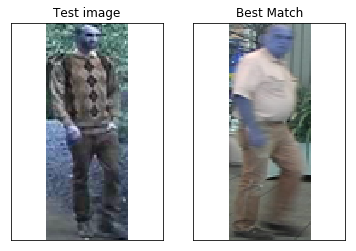

The index of the matched image in the input images  = 807


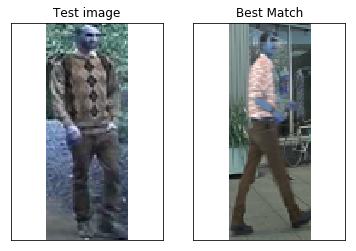

The index of the matched image in the input images  = 747


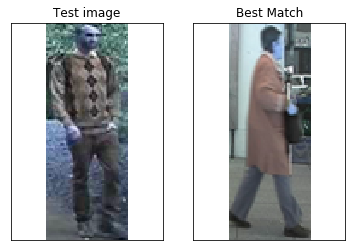

The index of the matched image in the input images  = 85


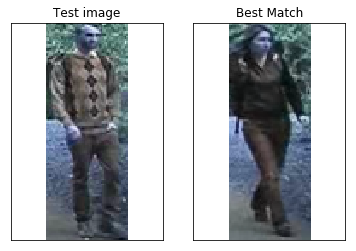

The index of the matched image in the input images  = 765


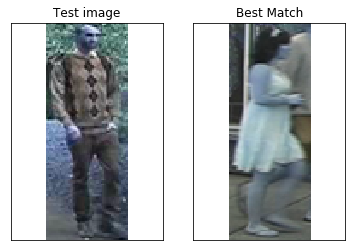

The index of the matched image in the input images  = 753


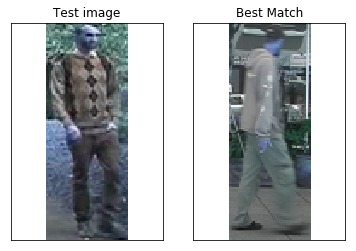

The index of the matched image in the input images  = 789


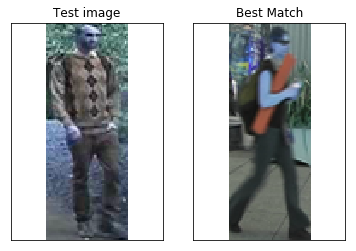

The index of the matched image in the input images  = 684


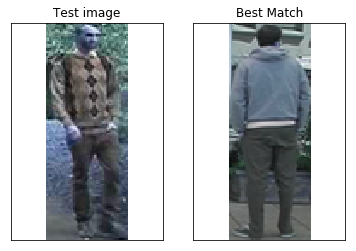

The index of the matched image in the input images  = 44


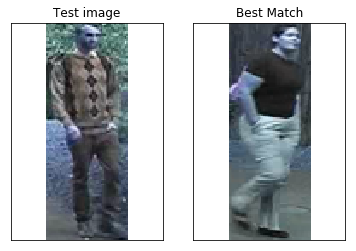

The index of the matched image in the input images  = 131


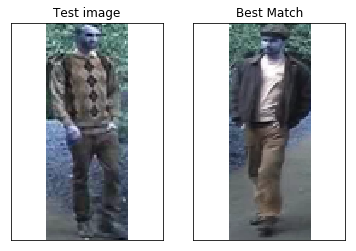

The index of the matched image in the input images  = 689


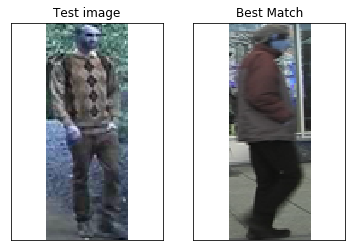

The index of the matched image in the input images  = 761


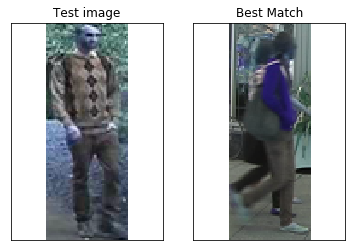

The index of the matched image in the input images  = 2


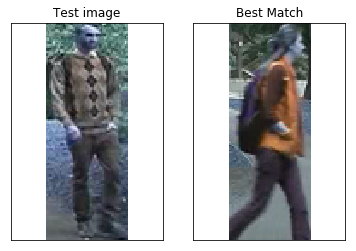

The index of the matched image in the input images  = 751


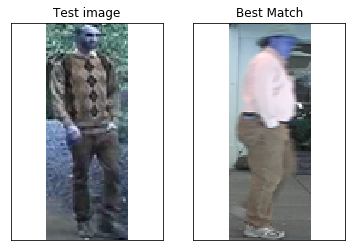

The index of the matched image in the input images  = 106


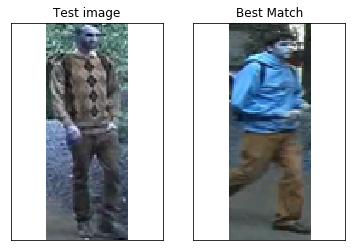

The index of the matched image in the input images  = 105


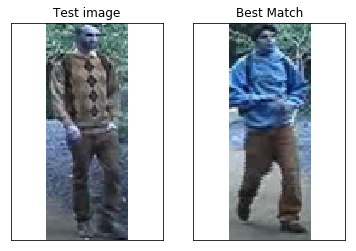

The index of the matched image in the input images  = 749


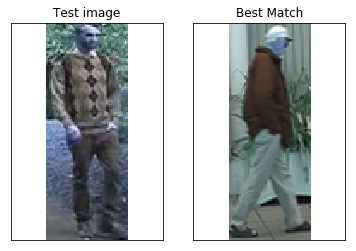

The index of the matched image in the input images  = 803


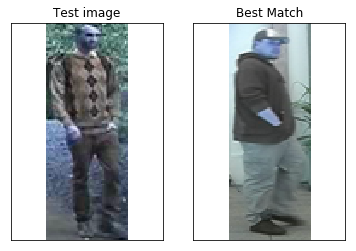

The index of the matched image in the input images  = 717


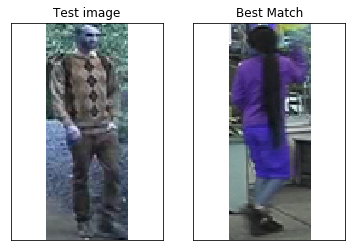

The index of the matched image in the input images  = 759


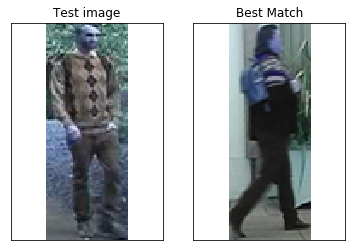

In [76]:
for x in range(len(neighbors)):
    print ("The index of the matched image in the input images  = " + str(neighbors[x, 2]))
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    
    ax1.set_title('Test image')
    ax2.set_title('Best Match')
    
    ax1.xaxis.set_visible(False)
    ax2.xaxis.set_visible(False)
    ax1.yaxis.set_visible(False)
    ax2.yaxis.set_visible(False)
    
    ax1.imshow(testimage)
    ax2.imshow(imagesets[neighbors[x, 2]])
    plt.show()